In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [4]:
test.head()

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [5]:
##Data Analysis and Training the Naive Bayes for Sentiment Analysis:

In [6]:
df.head(2)

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0


In [7]:
df.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [8]:
df.drop(columns='id',inplace=True)

In [9]:
df['sentiment_class'] = df['sentiment_class'].astype(object)

In [10]:
df.describe(include=object)

,original_text,lang,retweet_count,original_author,sentiment_class
count,3235,3231,3231,3235,3235
unique,3235,232,72,1574,3
top,Happy Mother’s Day - here is a virtual card ma...,en,0,LToddWood,0
freq,1,2994,2521,369,1701


In [11]:
df.isnull().sum()

original_text      0
lang               4
retweet_count      4
original_author    0
sentiment_class    0
dtype: int64

In [12]:
df['lang'].value_counts()

en                                                   2994
 pink Peruvian opal! via                                4
 Find More                                              2
&gt                                                     2
WORLDS OKAYEST MOTHER! &lt                              2
                                                     ... 
0.2203775303                                            1
-0.4757848717                                           1
0.3342376633                                            1
Anger Is The Canary In The Coal Mine Of Emotion..       1
0.2117897904                                            1
Name: lang, Length: 232, dtype: int64

In [13]:
##So, we can see the dataset requires some cleaning

In [14]:
##Let's see the tweets that say their language is not english:

df[df['lang']!='en']

,original_text,lang,retweet_count,original_author,sentiment_class
19,Happy mothersday to all those celebrating toda...,-0.0138325017,en,11,0
30,Exactly what my late mum aka hype mama would d...,-0.9677309496,en,0,0
64,It's the world's most difficult job No sick le...,-0.3876905537,en,1,0
65,Happy Mother’s Day! To all the amazing Mums ou...,0.5309553602,en,0,0
79,"Happy Mothers Day , Mummy! Nearly 90 and still...",-0.045423609,en,2,0
...,...,...,...,...,...
3174,Happy Mothers Day All My Nigerian Massive Fami...,0.2117897904,en,0,0
3186,HAPPY MOTHERS DAY ! HAPPY MOTHERS DAY !!Now th...,-0.8739088126,en,0,0
3197,Isan Elba celebrates Happy Mothers’ Day with h...,0.4945825935,en,0,0
3200,Still miss my mom she passed 18th of March 201...,0.6927740873,0,0,0


In [15]:
##We can see above that some data is shifted towards the right, so to show the retweet count
#in these rows, we need to shift it back from the author feature

In [16]:
##Cleaning Retweeet count:
list1 = []
for i in np.arange(500):
    list1.append(str(i))
df['retweet_count'] = df['retweet_count'].apply(lambda d: d if d in list1 else np.nan)

In [17]:
df['retweet_count'].value_counts()

0      2521
1       291
2        84
3        45
4        25
5        18
6         7
8         7
11        7
10        4
24        4
7         3
18        3
16        3
27        3
32        3
15        2
12        2
20        2
9         2
14        2
35        1
19        1
37        1
17        1
21        1
59        1
45        1
96        1
23        1
13        1
25        1
118       1
28        1
33        1
61        1
Name: retweet_count, dtype: int64

In [18]:
df.dtypes

original_text      object
lang               object
retweet_count      object
original_author    object
sentiment_class    object
dtype: object

In [19]:
##We can actually drop "language" since most of the tweets(almost all of them) are in "English"

In [20]:
df.drop(columns='lang',inplace=True)

In [21]:
df.isnull().sum()

original_text        0
retweet_count      182
original_author      0
sentiment_class      0
dtype: int64

In [22]:
df.head(2)

,original_text,retweet_count,original_author,sentiment_class
0,Happy #MothersDay to all you amazing mothers o...,0,BeenXXPired,0
1,Happy Mothers Day Mum - I'm sorry I can't be t...,1,FestiveFeeling,0


In [23]:
df['retweet_count'].value_counts() ## WE see that retweet count is highest for 0

0      2521
1       291
2        84
3        45
4        25
5        18
6         7
8         7
11        7
10        4
24        4
7         3
18        3
16        3
27        3
32        3
15        2
12        2
20        2
9         2
14        2
35        1
19        1
37        1
17        1
21        1
59        1
45        1
96        1
23        1
13        1
25        1
118       1
28        1
33        1
61        1
Name: retweet_count, dtype: int64

C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


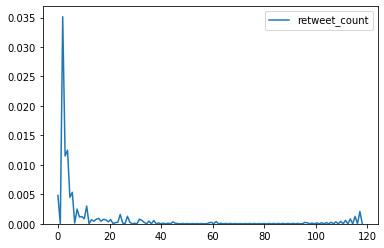

In [24]:
sns.kdeplot(df['retweet_count'])

In [25]:
df['retweet_count'].mode()

0    0
dtype: object

In [26]:
df['retweet_count'].dtype

dtype('O')

In [27]:
df.dtypes

original_text      object
retweet_count      object
original_author    object
sentiment_class    object
dtype: object

In [28]:
df.head(2)

,original_text,retweet_count,original_author,sentiment_class
0,Happy #MothersDay to all you amazing mothers o...,0,BeenXXPired,0
1,Happy Mothers Day Mum - I'm sorry I can't be t...,1,FestiveFeeling,0


In [29]:
df.isnull().sum()

original_text        0
retweet_count      182
original_author      0
sentiment_class      0
dtype: int64

In [30]:
df.shape[0]

3235

In [31]:
for i in df.columns:
    print(i,":",df[i].nunique())

original_text : 3235
retweet_count : 36
original_author : 1574
sentiment_class : 3


In [32]:
##So we can see that there are 1574 authors for 3235 tweets.

In [33]:
##Now, we can also check the top authors, and later we can also find out how were the sentiments of
#these authors as well. Of course, first we need to clean the author feature:

In [34]:
df['original_author'].unique()

array(['BeenXXPired', 'FestiveFeeling', 'KrisAllenSak', ..., 'lupoista',
       'FaeryLover', 'localcreativity'], dtype=object)

In [35]:
df['retweet_count'].fillna("Null",inplace=True)

In [36]:
for i in df[df['retweet_count']=="Null"].index:
    df.iloc[i]['retweet_count'] = df.iloc[i]['original_author']
    df.iloc[i]['original_author'] = np.nan

In [37]:
df.isnull().sum()

original_text        0
retweet_count        0
original_author    182
sentiment_class      0
dtype: int64

In [38]:
df['retweet_count'].value_counts()

0               2621
1                317
2                 94
3                 47
4                 25
                ... 
28                 1
en                 1
0.2037180574       1
0.0014674458       1
0.1286903083       1
Name: retweet_count, Length: 77, dtype: int64

In [39]:
##Cleaning retweet count again:

In [40]:
list1 = []
for i in np.arange(500):
    list1.append(str(i))
df['retweet_count'] = df['retweet_count'].apply(lambda d: d if d in list1 else np.nan)

In [41]:
df['retweet_count'].value_counts()

0      2621
1       317
2        94
3        47
4        25
5        18
11        8
6         7
8         7
10        4
7         4
24        4
18        3
16        3
27        3
32        3
9         2
20        2
12        2
14        2
15        2
118       1
35        1
30        1
19        1
37        1
17        1
21        1
59        1
96        1
25        1
33        1
61        1
23        1
13        1
31        1
28        1
45        1
Name: retweet_count, dtype: int64

In [42]:
df.isnull().sum()

original_text        0
retweet_count       40
original_author    182
sentiment_class      0
dtype: int64

In [43]:
##Now we can fill the retweet count nulls with median:
df['retweet_count'].fillna(df['retweet_count'].median(),inplace=True)

In [44]:
df.dtypes

original_text      object
retweet_count      object
original_author    object
sentiment_class    object
dtype: object

In [45]:
df['retweet_count'] = df['retweet_count'].astype(int)

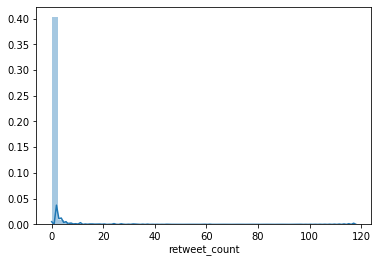

In [46]:
sns.distplot(df['retweet_count'])

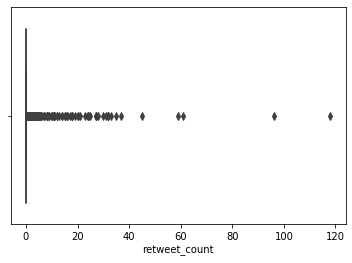

In [47]:
sns.boxplot(df['retweet_count'])

In [48]:
##We see a very high number of outliers in the retweet count

In [49]:
##Now working with original author:
df['original_author'].value_counts()

LToddWood          369
MoM_Mastering       99
andreaanderegg      86
LiveGoodProduct     71
0                   46
                  ... 
AyanAwad2            1
InvestGator_org      1
tmpislive            1
jrcarlisle3          1
Tmtisclutch          1
Name: original_author, Length: 1531, dtype: int64

In [50]:
list1 = []
for i in np.arange(500):
    list1.append(str(i))
list2 = []
for i in df['original_author']:
    if i in list1:
        list2.append(i)

In [51]:
list2

['0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '16',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '3',
 '0',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0']

In [52]:
##The above are again retweet counts which we need to shift to the right feature(retweet count):

In [53]:
import sys
list1 = []
for i in np.arange(500):
    list1.append(str(i))

for i in list(df.index):
    if df.loc[i,'original_author'] in list1:
        df.loc[i,'retweet_count'] = int(df.loc[i,'original_author'])
        df.loc[i,'original_author'] = np.nan

In [54]:
df.isnull().sum()

original_text        0
retweet_count        0
original_author    241
sentiment_class      0
dtype: int64

In [55]:
df['original_author'].nunique()

1526

In [ ]:
##Now author has null values, which we can't really impute. That wouldn't serve the purpose.

In [69]:
df.iloc[df['original_author'].isnull()[df['original_author'].isnull()==True].index]

,original_text,retweet_count,original_author,sentiment_class
19,Happy mothersday to all those celebrating toda...,11,NaN,0
30,Exactly what my late mum aka hype mama would d...,0,NaN,0
64,It's the world's most difficult job No sick le...,1,NaN,0
65,Happy Mother’s Day! To all the amazing Mums ou...,0,NaN,0
79,"Happy Mothers Day , Mummy! Nearly 90 and still...",2,NaN,0
...,...,...,...,...
3174,Happy Mothers Day All My Nigerian Massive Fami...,0,NaN,0
3186,HAPPY MOTHERS DAY ! HAPPY MOTHERS DAY !!Now th...,0,NaN,0
3197,Isan Elba celebrates Happy Mothers’ Day with h...,0,NaN,0
3200,Still miss my mom she passed 18th of March 201...,0,NaN,0


In [ ]:
##Now, let's do some analysis based on the cleaned data(we will let the nulls in original_author
#remain as such because authors won't be required at a later stage)

In [74]:
df.groupby(['original_author','sentiment_class']).agg({'original_text':'count'}).sort_values(by='original_text',ascending=False)

original_text
original_author sentiment_class               
LToddWood        0                         184
                 1                         106
                -1                          79
MoM_Mastering    0                          42
LiveGoodProduct  0                          40
...                                        ...
Mike_Willss      0                           1
Mike_SaysSo      0                           1
MikeSotoDepo    -1                           1
MikeLawry07      0                           1
zsamstore        1                           1

[1818 rows x 1 columns]

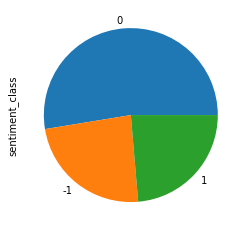

In [75]:
##Now let's check presence of sentiments in all of the data:
df['sentiment_class'].value_counts().plot.pie()

In [ ]:
##So, we can see that in our train data, most of the sentiments were neutral. 

In [76]:
df.dtypes

original_text      object
retweet_count       int32
original_author    object
sentiment_class    object
dtype: object

In [105]:
sent = df[['original_text','sentiment_class']]

In [106]:
X = df['original_text']
y = df['sentiment_class'].astype(int)

In [107]:
test = test['original_text']

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [109]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [110]:
vect.fit(X)

X_train_tr = vect.transform(X)
X_test_tr = vect.transform(test)



In [111]:
print(X_train_tr)

  (0, 1277)	1
  (0, 1576)	1
  (0, 2132)	1
  (0, 3571)	1
  (0, 6601)	1
  (0, 6629)	1
  (0, 7861)	1
  (0, 8810)	1
  (0, 9130)	2
  (0, 9139)	1
  (0, 10313)	1
  (0, 10656)	1
  (0, 12024)	1
  (0, 12946)	1
  (0, 13151)	1
  (0, 13420)	1
  (0, 13602)	1
  (1, 1277)	1
  (1, 1728)	1
  (1, 2202)	1
  (1, 2577)	1
  (1, 2708)	1
  (1, 3529)	1
  (1, 4172)	1
  (1, 4380)	2
  :	:
  (3233, 8330)	1
  (3233, 9094)	1
  (3233, 9117)	1
  (3233, 9139)	1
  (3233, 13753)	1
  (3233, 13825)	1
  (3233, 14039)	1
  (3233, 14131)	1
  (3234, 668)	1
  (3234, 3548)	1
  (3234, 3571)	1
  (3234, 4380)	1
  (3234, 5683)	1
  (3234, 6601)	1
  (3234, 6979)	1
  (3234, 7115)	1
  (3234, 7260)	1
  (3234, 7286)	1
  (3234, 9130)	1
  (3234, 9139)	1
  (3234, 11030)	2
  (3234, 11062)	1
  (3234, 11452)	1
  (3234, 13891)	1
  (3234, 14039)	1


In [112]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
bnb = BernoulliNB()

bnb.fit(X_train_tr,y)
y_pred = bnb.predict(X_test_tr)
y_pred_prob = bnb.predict_proba(X_test_tr)[:,1]

print(y_pred)

[0 0 0 ... 0 0 0]


In [119]:
pred = pd.DataFrame(y_pred)

In [118]:
test1 = pd.DataFrame(test)

In [123]:
sentiment_testdf = pd.concat([test1,pred],axis=1).rename(columns={0:"Sentiment"})

In [125]:
sentiment_testdf['Sentiment'].value_counts()

 0    1383
 1       3
-1       1
Name: Sentiment, dtype: int64

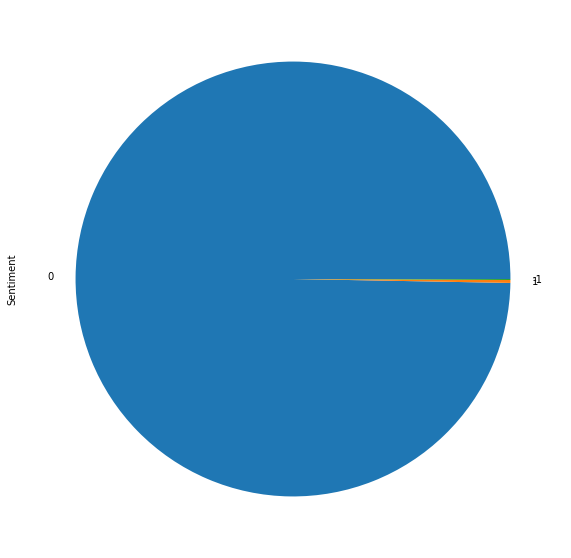

In [127]:
plt.figure(figsize=(12,10))
sentiment_testdf['Sentiment'].value_counts().plot.pie()

In [128]:
##As we can see, the model is giving out a biased opinion on the tweets, telling us that almost
#everything is neutral, but I believe strongly that that is not the case, so a better predicting
#method will be used sooner than expected. For now, hope this was helpful!